In [85]:
import pandas as pd

a) Load the dataset in an iPython notebook

In [86]:
data = pd.read_csv("HW3Data.csv", header=None)

b) Feature selection is an important machine-learning task that allows us to select the most important features in a given dataset. Scikit-learn provides multiple methods for choosing the best features. Use the Recursive Feature Elimination method (REF) with cross-validation here, and show a plot to demonstrate the performance versus number of selected features

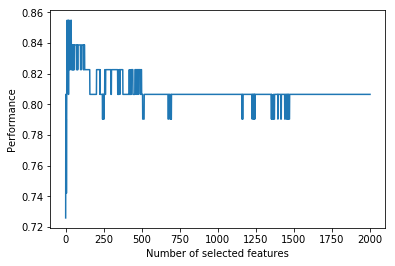

In [87]:
#Some of the code below is based on the code we were given with the exercise
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

x = data.iloc[:,1:2001].copy()
y = data.iloc[:,0].copy()
svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(x, y)

plt.figure()
plt.xlabel("Number of selected features")
plt.ylabel("Performance")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

The graph shows that based on RFE the best number of features is 37

c) Use the holdout method for testing using only the selected features. Report the performance.

In [88]:
x = x.iloc[:, rfecv.support_].copy() #Mask out unwanted features (columns)

In [89]:
x_training = x.iloc[0:50,:].copy() #Obtain training data (features)

In [90]:
y_training = data.iloc[0:50,0].copy() #Obtain training data (labels)

In [91]:
x_testing = x.iloc[50:62,:].copy() #Obtain testing data (features)

In [92]:
y_testing = data.iloc[50:62,0].copy() #Obtain testing data (labels)

In [93]:
svc_2 = SVC(kernel="linear")

svc_2.fit(x_training, y_training)

svc_2.score(x_testing, y_testing)

1.0

The obtained performance with the hold out method was 100%. Since the homework did not specify what classifier we should use, I just used a svm like in the example provided. 